## Upstream canyon run with conduino, probes ANK1 and ANK2, high N, 

Probe ANK1 upstream and ANK2 downstream, profiler probe P, no dye.

### Specifics and notes
* 800 g salt into bucket 1
* Table profile f0=0.70, dt1=16.8s, f1=0.75, dt2=50, f2=0.78 rad/s.
* Profiler now has a guiding tube (PVC) to prevent it from swinging during casts. You need to push the probe down a bit during downcasts to make sure probe and cable don't get stuck at tube.   
* Conduino measurements approximately every 30 min.

Calibration for probes from 29 March 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P_probes_29mar19.ipynb)

### Stratification

Bucket 1 , 800 g salt

$\rho_1= 1.03118$ g cm$^{-3}$

$\rho_2= 0.99755$ g cm$^{-3}$

### Tank filling
Started: 09:25 am, ended: 11:05 am.

### Conduino measurements
Conduino measurements

|time|What for?|file|
|:--:|:-------:|:--:|
|11:05|profile|profile_after_filling.mat|
|11:07|check up|checkup_11_07.mat|
|11:35|check up|checkup_11_35.mat|
|12:00|check up|checkup_12_00.mat|
|12:30|check up|checkup_12_36.mat|
|13:00|check up|checkup_13_00.mat|
|13:27|check up|checkup_13_27.mat|
|13:30(?)|profile|initial_profile.mat|
|13:32(?)|experiment|experiment.mat|
|13:35(?)|profile|final_profile.mat|




In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('whitegrid')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 29 feb 2019 in calibration_29mar19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.997378+(0.006040*reading)+(0.001648*reading**2)+(0.000105*reading**3)
    return(fitP)

def dens_ANK1(read):
    '''Calibration from 29 March 2019 in calibration_29mar19.ipynb'''
    rho_1 = 0.997387+0.004844*read+0.000312*read**2+0.000204*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 29 March 2019 in calibration_29mar19.ipynb '''
    rho_2 = 0.997311+0.006653*read+0.003429*read**2+-0.000041*read**3 # March 29, after knocking off
    #rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 # March 21st, Ashu's calibration, values are too high
    return(rho_2)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.35,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')


Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P|



### Forcing

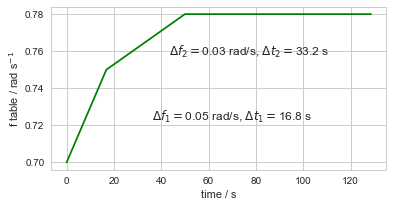

In [5]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.70 # initial f rad/s
f1 = 0.75 # rad/s
f2 = 0.78 # rad/s
t0 = 16.8 # s
t1 = 50.0 # s
exp_file = '../../exp_04apr19/experiment.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

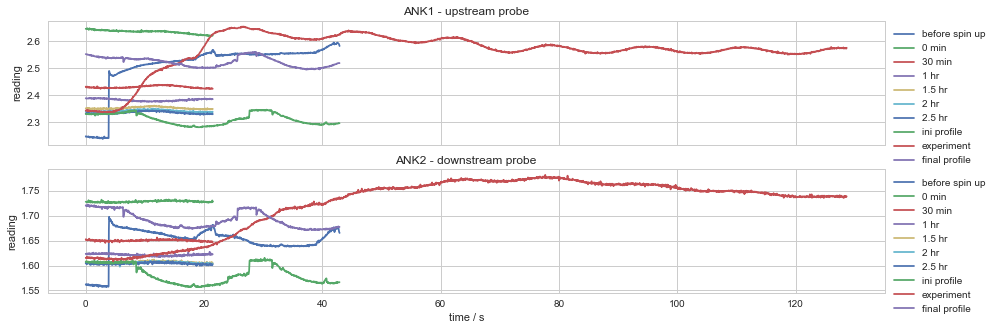

In [6]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr',
          '2 hr','2.5 hr','ini profile','experiment','final profile']

filepaths = ['../../exp_04apr19/profile_after_filling.mat',
             '../../exp_04apr19/checkup_11_07.mat',
             '../../exp_04apr19/checkup_11_35.mat',
             '../../exp_04apr19/checkup_12_00.mat',
             '../../exp_04apr19/checkup_12_36.mat',
             '../../exp_04apr19/checkup_13_00.mat',
             '../../exp_04apr19/checkup_13_27.mat',
             '../../exp_04apr19/initial_profile.mat',
             '../../exp_04apr19/experiment.mat',
             '../../exp_04apr19/final_profile.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

before spin up 1.0147823828621285 1.017415907613959
0 min 1.016047404784382 1.0188360744183191
30 min 1.0139364797126795 1.0174414987927758
1 hr 1.0134621019060501 1.016935154004295
1.5 hr 1.0131727412498315 1.016685375880433
2 hr 1.0130671679674452 1.0166597585817025
2.5 hr 1.0130017166573073 1.0166371252334365
ini profile 1.0127784075331208 1.0162650837398646
experiment 1.0153302237648505 1.0187793775716372
final profile 1.0148813411808575 1.0181705957944458


Text(0.5,0,'time / s')

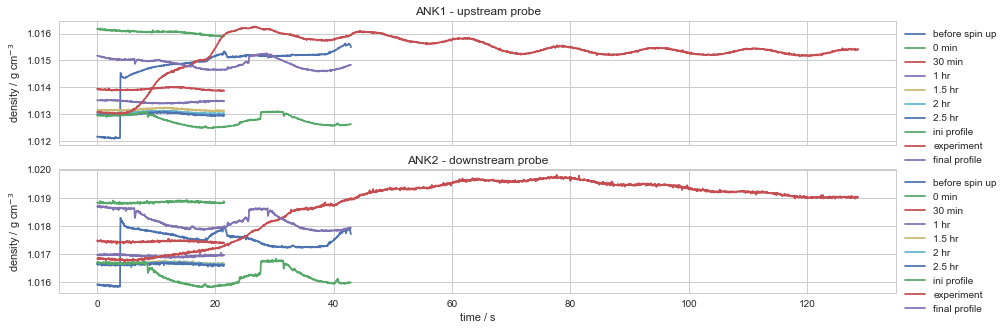

In [7]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr',
          '2 hr','2.5 hr','ini profile','experiment','final profile']

filepaths = ['../../exp_04apr19/profile_after_filling.mat',
             '../../exp_04apr19/checkup_11_07.mat',
             '../../exp_04apr19/checkup_11_35.mat',
             '../../exp_04apr19/checkup_12_00.mat',
             '../../exp_04apr19/checkup_12_36.mat',
             '../../exp_04apr19/checkup_13_00.mat',
             '../../exp_04apr19/checkup_13_27.mat',
             '../../exp_04apr19/initial_profile.mat',
             '../../exp_04apr19/experiment.mat',
             '../../exp_04apr19/final_profile.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    densP1 = dens_ANK1(P1)
    densP2 = dens_ANK2(P2)
    ax0.plot(time,densP1, label=lab)
    ax1.plot(time,densP2, label=lab)
    print(lab, np.mean(densP1), np.mean(densP2))
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

Change in density throughout spin up is 

In [8]:
DeltaANK1 = 1.016047404784382-1.0130017166573073 
DeltaANK2 =  1.0188360744183191- 1.0166371252334365

print(DeltaANK1, DeltaANK2)

0.0030456881270746194 0.002198949184882615


../../exp_04apr19/profile_after_filling.mat
../../exp_04apr19/initial_profile.mat
../../exp_04apr19/experiment.mat
../../exp_04apr19/final_profile.mat


Text(0.5,0,'time / s')

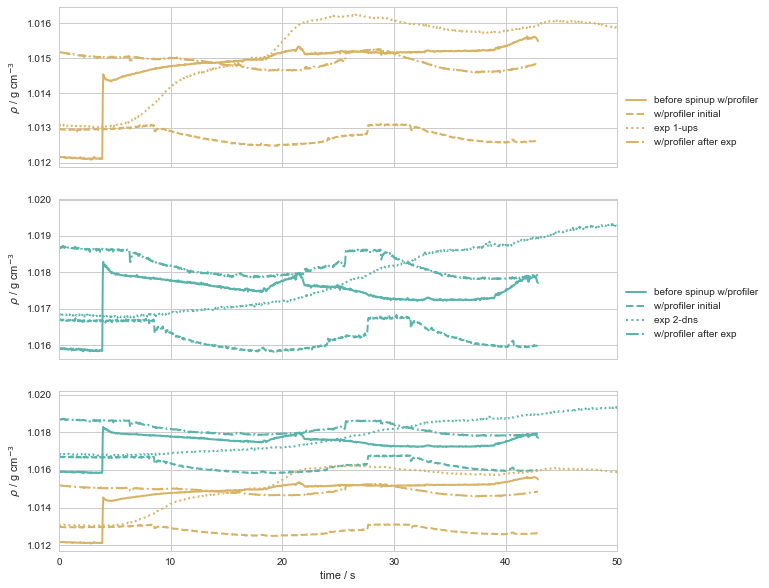

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,10), sharex=True)

labels1 = ['before spinup w/profiler', 'w/profiler initial','exp 1-ups','w/profiler after exp']
labels2 = ['before spinup w/profiler', 'w/profiler initial','exp 2-dns','w/profiler after exp']

colors = ['#d8b365','#5ab4ac']

filepaths = ['../../exp_04apr19/profile_after_filling.mat',
             '../../exp_04apr19/initial_profile.mat',
             '../../exp_04apr19/experiment.mat',
             '../../exp_04apr19/final_profile.mat']

lines = ['-','--',':','-.','-','--']
linewidths = [2,2,2,2,2,2]

for filepath, line, linew, lab1, lab2 in zip(filepaths, lines, linewidths, labels1, labels2):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1'] 
    P2 = mat['ch2'] 
    density_1 = dens_ANK1(P1)
    density_2 = dens_ANK2(P2)
    
    time = mat['time']
    ax0.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax1.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    ax2.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax2.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,0.5))
ax1.legend(bbox_to_anchor=(1,0.5))

ax0.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax1.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')

ax0.set_xlim(0,50)
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)

ax2.set_xlabel('time / s')

Notes:
    


### Profiles

Text(0,0.5,'$\\rho$ / g cm$^{-3}$')

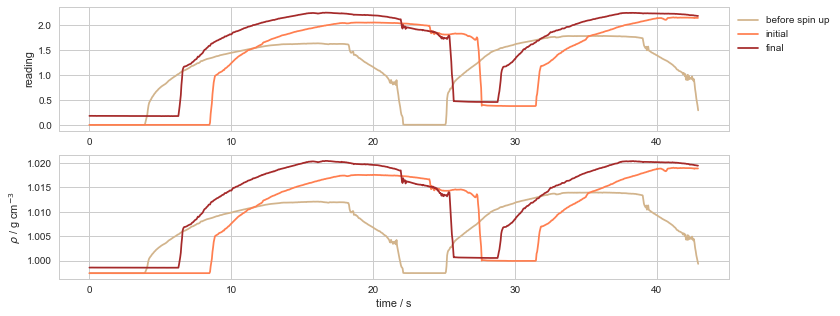

In [10]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))

colors = ['white','tan','coral','brown']

filepath_ini0 = '../../exp_04apr19/profile_after_filling.mat'
filepath_ini = '../../exp_04apr19/initial_profile.mat'
filepath_fin = '../../exp_04apr19/final_profile.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax1.plot(time_ini0,P_ini0, label='before spin up', color=colors[1])
ax1.plot(time_ini,P_ini, label='initial', color=colors[2])
ax1.plot(time_fin,P_fin, label='final', color=colors[3])
ax2.plot(time_ini0,dens_P_ini0, label='before spin up', color=colors[1])
ax2.plot(time_ini,dens_P_ini, label='initial', color=colors[2])
ax2.plot(time_fin,dens_P_fin, label='final', color=colors[3])

ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')


I don't believe that the densest water 2 mm above the tank bottom is less than 1.015 g/cm^3... maybe the profiler need to be recalibrated.

### Experiment

../../exp_04apr19/experiment.mat


Text(0.5,0,'sample')

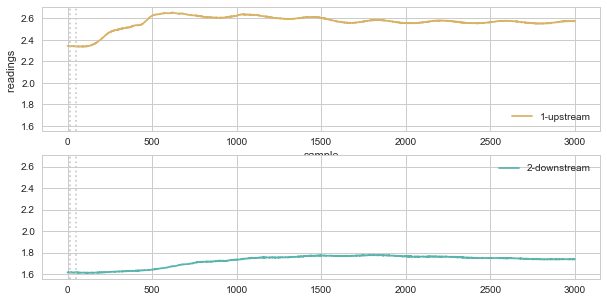

In [11]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']
colors = ['#d8b365','#5ab4ac']

filepath = '../../exp_04apr19/experiment.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color=colors[0])
ax1.plot(P2,'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
plot_uprofile(ax1)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density')

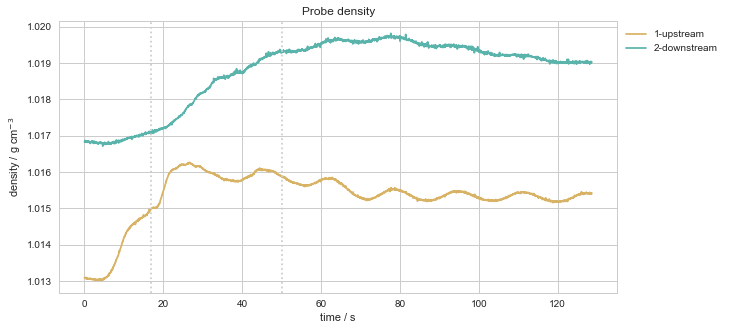

In [12]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1),'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2),'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


Text(0.5,1,'Probe density minus initial density')

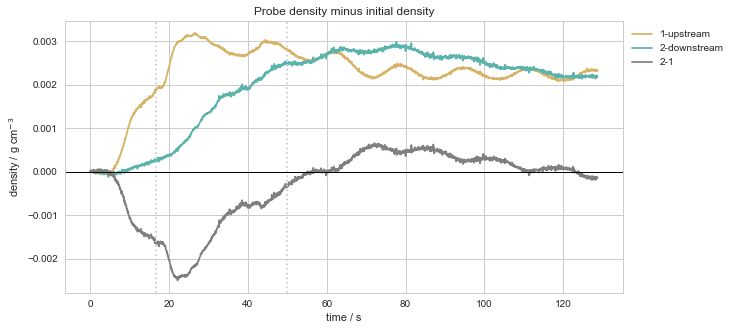

In [13]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


### Comparison between 1 and 2 canyon runs with high N

All high N runs: downstream covered and two canyons - I still need to do upstream covered

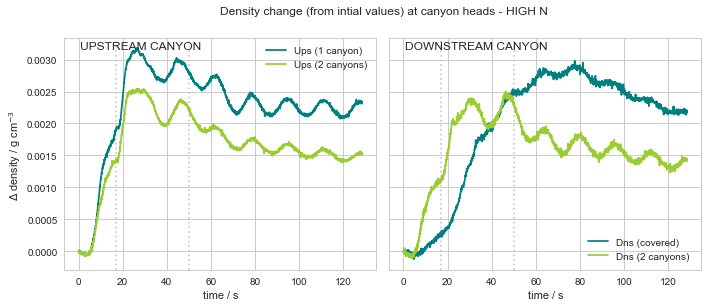

In [14]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_two = '../../exp_26mar19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_two = sio.loadmat(filepath_two, squeeze_me=True)
P1_two = mat_two['ch1']
P2_two = mat_two['ch2']
time_two = mat_two['time']

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='Ups (1 canyon) ', color='teal')
ax0.plot(time_two,dens_ANK1(P1_two)-dens_ANK1(P1_two)[0], label='Ups (2 canyons)', color='yellowgreen')

ax1.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns (covered)' , color='teal')
ax1.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0], label='Dns (2 canyons) ', color='yellowgreen')

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.5,1.1,'Density change (from intial values) at canyon heads - HIGH N',transform=ax0.transAxes)
ax0.text(0.05,0.95,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.05,0.95,'DOWNSTREAM CANYON',transform=ax1.transAxes)

plt.tight_layout()

**Left panel**: Density change in the upstream canyon is larger when there is only 1 canyon and canyon upwelling is suppressed through the whole upwelling event when there are two canyons. Also, the frequency of the oscillation/wavy thing seems to be very similar for both N cases.

** Right panel**: Density change on the downstream canyon head is larger than on the dowstream shelf while forcing is peaking (TD phase). After that, density change on the downstream shelf (equivalent to downstream canyon covered) is larger after forcing decreases (maybe advective phase). I think we see the pool of upwelled water passing over the downstream probe.

### UPS - canyon runs low N and high N (DNS canyon covered)

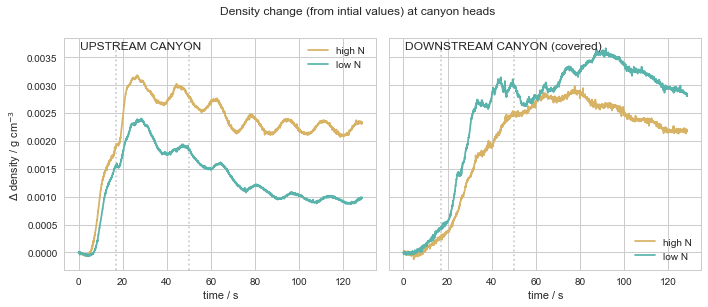

In [15]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_upsLowN = '../../exp_02apr19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_upsLowN = sio.loadmat(filepath_upsLowN, squeeze_me=True)
P1_upsLowN = mat_upsLowN['ch1']
P2_upsLowN = mat_upsLowN['ch2']
time_upsLowN = mat_upsLowN['time']

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='high N ', color=colors[0])
ax0.plot(time_upsLowN,dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0], label='low N', color=colors[1])

ax1.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='high N' , color=colors[0])
ax1.plot(time_upsLowN,dens_ANK2(P2_upsLowN)-dens_ANK2(P2_upsLowN)[0], label='low N ', color=colors[1])

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.5,1.1,'Density change (from intial values) at canyon heads',transform=ax0.transAxes)
ax0.text(0.05,0.95,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.05,0.95,'DOWNSTREAM CANYON (covered)',transform=ax1.transAxes)

plt.tight_layout()

**left panel**: Density change near canyon head is larger with higher N. $\Delta \rho$ decreases faster after 50 sec

**right panel**: Density change is larger for low N run on downstream shelf (eqiv. to covered dns canyon). In low N run, there are distinct spikes during forcing phase and a sharp drop in $\Delta \rho$ before it starts increasing again during after forcing stops. This is not evident (maybe it is there but very small) for the high N case.

### Figures for talks

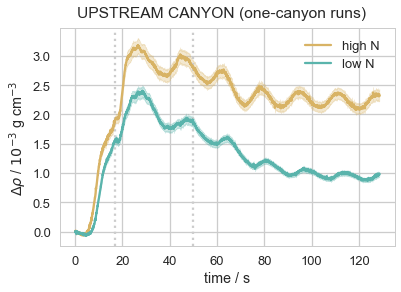

In [16]:
sns.set_context('talk')
fig, (ax0) = plt.subplots(1,1, figsize=(6,4), sharey=True)

filepath_upsLowN = '../../exp_02apr19/experiment.mat'

plot_uprofile(ax0)

mat_upsLowN = sio.loadmat(filepath_upsLowN, squeeze_me=True)
P1_upsLowN = mat_upsLowN['ch1']
P2_upsLowN = mat_upsLowN['ch2']
time_upsLowN = mat_upsLowN['time']

ax0.plot(time,(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,'-', label='high N ', color=colors[0])
ax0.fill_between(time,
                 ((dens_ANK1(P1)-dens_ANK1(P1)[0])-0.04*(dens_ANK1(P1)-dens_ANK1(P1)[0]))*1E3,
                 ((dens_ANK1(P1)-dens_ANK1(P1)[0])+0.04*(dens_ANK1(P1)-dens_ANK1(P1)[0]))*1E3,
                 color=colors[0], alpha=0.3)
ax0.plot(time_upsLowN,(dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0])*1E3, label='low N', color=colors[1])
ax0.fill_between(time_upsLowN,
                 ((dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0])-0.04*(dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0]))*1E3,
                 ((dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0])+0.04*(dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0]))*1E3,
                 color=colors[1], alpha=0.3)


ax0.legend(loc=0)
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.text(0.05,1.05,'UPSTREAM CANYON (one-canyon runs)',transform=ax0.transAxes)
fig.patch.set_facecolor('white')
fig.savefig('figures/upstream_1can.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

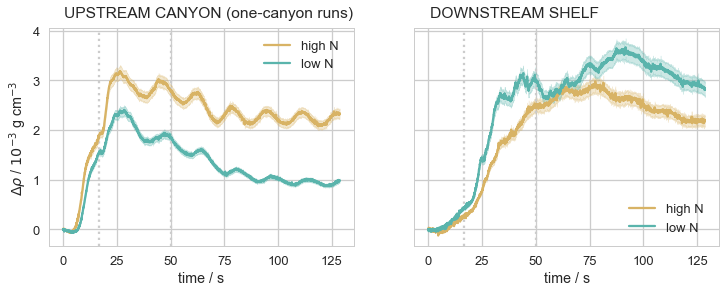

In [24]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4), sharey=True)

filepath_upsLowN = '../../exp_02apr19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_upsLowN = sio.loadmat(filepath_upsLowN, squeeze_me=True)
P1_upsLowN = mat_upsLowN['ch1']
P2_upsLowN = mat_upsLowN['ch2']
time_upsLowN = mat_upsLowN['time']

# Plot upstream canyon ------  max error in ANK1 calibration is 4%  ----
ax0.plot(time,(dens_ANK1(P1)-dens_ANK1(P1)[0])*1E3,'-', label='high N ', color=colors[0])
ax0.fill_between(time,
                 ((dens_ANK1(P1)-dens_ANK1(P1)[0])-0.04*(dens_ANK1(P1)-dens_ANK1(P1)[0]))*1E3,
                 ((dens_ANK1(P1)-dens_ANK1(P1)[0])+0.04*(dens_ANK1(P1)-dens_ANK1(P1)[0]))*1E3,
                 color=colors[0], alpha=0.3)
ax0.plot(time_upsLowN,(dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0])*1E3, label='low N', color=colors[1])

ax0.fill_between(time_upsLowN,
                 ((dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0])-0.04*(dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0]))*1E3,
                 ((dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0])+0.04*(dens_ANK1(P1_upsLowN)-dens_ANK1(P1_upsLowN)[0]))*1E3,
                 color=colors[1], alpha=0.3)

# Plot downstream shelf ----   max error ANK2 is 5% ----
ax1.plot(time,(dens_ANK2(P2)-dens_ANK2(P2)[0])*1E3,'-', label='high N ', color=colors[0])
ax1.fill_between(time,
                 ((dens_ANK2(P2)-dens_ANK2(P2)[0])-0.05*(dens_ANK2(P2)-dens_ANK2(P2)[0]))*1E3,
                 ((dens_ANK2(P2)-dens_ANK2(P2)[0])+0.05*(dens_ANK2(P2)-dens_ANK2(P2)[0]))*1E3,
                 color=colors[0], alpha=0.3)
ax1.plot(time_upsLowN,(dens_ANK2(P2_upsLowN)-dens_ANK2(P2_upsLowN)[0])*1E3, label='low N', color=colors[1])

ax1.fill_between(time_upsLowN,
                 ((dens_ANK2(P2_upsLowN)-dens_ANK2(P2_upsLowN)[0])-0.05*(dens_ANK2(P2_upsLowN)-dens_ANK2(P2_upsLowN)[0]))*1E3,
                 ((dens_ANK2(P2_upsLowN)-dens_ANK2(P2_upsLowN)[0])+0.05*(dens_ANK2(P2_upsLowN)-dens_ANK2(P2_upsLowN)[0]))*1E3,
                 color=colors[1], alpha=0.3)

ax0.legend(loc=0)
ax1.legend(loc=0)

ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$ g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.05,1.05,'UPSTREAM CANYON (one-canyon runs)',transform=ax0.transAxes)
ax1.text(0.05,1.05,'DOWNSTREAM SHELF',transform=ax1.transAxes)

fig.patch.set_facecolor('white')
fig.savefig('figures/1can_runs_ups_and_downs.pdf', format='pdf',dpi=150, facecolor=fig.get_facecolor())

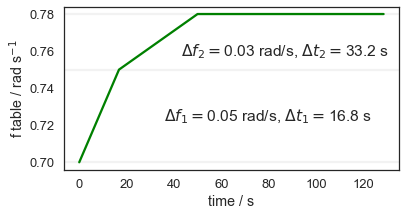

In [18]:
sns.set_style('white')
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.70 # initial f rad/s
f1 = 0.75 # rad/s
f2 = 0.78 # rad/s
t0 = 16.8 # s
t1 = 50.0 # s
exp_file = '../../exp_04apr19/experiment.mat'

ax0.axhline(0.70, color='0.9', alpha=0.5)
ax0.axhline(0.75, color='0.9', alpha=0.5)
ax0.axhline(0.78, color='0.9', alpha=0.5)

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

fig.savefig('figures/forcing.pdf', format='pdf')
